We have a Store sales data of United States. In this dataset we have 5901 rows and 21 columns. Dataset contains Order ID, Ship Mode, Customer ID or name , Geometrical info and product info and sales or profit , returns and payment mode columns.

We have to find some information and conclusion about sales and profit.

**Importing Libraries**

In [15]:
import plotly.express as px
import seaborn as sns
import pandas as pd

**Importing Data**

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df = pd.read_excel("/content/drive/MyDrive/DATA FILES/SuperStore Sales DataSet.xlsx")

In [18]:
df.head(1)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN


In [19]:
df.shape

(5901, 23)

In [20]:
len(df['Sub-Category'].unique())

17

**There are 3 types of category and 17 products in the data.**

In [21]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

<ipython-input-22-990245a5fa83>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= df, x= 'month', y= 'Profit', hue= 'year', ci= None)


<Axes: xlabel='month', ylabel='Profit'>

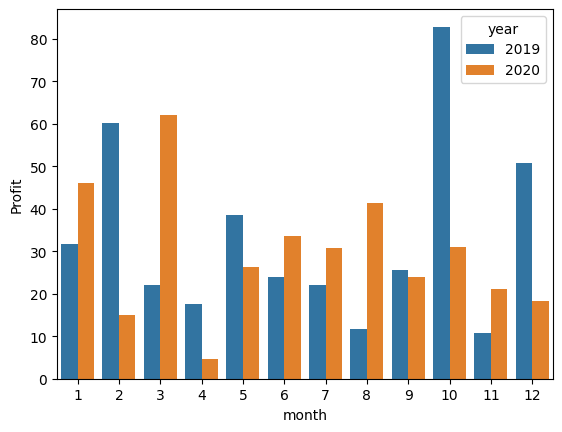

In [22]:
sns.barplot(data= df, x= 'month', y= 'Profit', hue= 'year', ci= None)

As we can see all months are similar except April from 2019 and 2020. Store Profit had decreased in **April** month.

In [23]:
df.isnull().sum()

Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns             5614
Payment Mode           0
ind1                5901
ind2                5901
year                   0
month                  0
dtype: int64

**Drop Null columns/Values**

In [24]:
df.drop(['ind1', 'ind2'], axis=1 , inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  5901 non-null   int64         
 1   Order ID          5901 non-null   object        
 2   Order Date        5901 non-null   datetime64[ns]
 3   Ship Date         5901 non-null   datetime64[ns]
 4   Ship Mode         5901 non-null   object        
 5   Customer ID       5901 non-null   object        
 6   Customer Name     5901 non-null   object        
 7   Segment           5901 non-null   object        
 8   Country           5901 non-null   object        
 9   City              5901 non-null   object        
 10  State             5901 non-null   object        
 11  Region            5901 non-null   object        
 12  Product ID        5901 non-null   object        
 13  Category          5901 non-null   object        
 14  Sub-Category      5901 n

In [26]:
df.head(1)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,year,month
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,2019,1


In [27]:
df['Returns'].unique()

array([nan,  1.])

**Fill Null valus**

In [28]:
df.Returns.fillna(0, inplace = True)

In [29]:
df['Returns'].unique()

array([0., 1.])

In [30]:
df.head(1)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,year,month
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,0.0,Online,2019,1


In [55]:
px.histogram(df, 'Sales', 'Category', barmode='group', text_auto='Sales', title='Sum of sales by Category', color='Category', template='simple_white')

In [56]:
df.groupby('Sub-Category').sum().sort_values('Profit').head(3)


<ipython-input-56-6a0a4c841cf2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns,year,month
Sub-Category,,,,,,,
Tables,1015807,119293.7430,736,-11091.6365,12.0,383714,1529
Supplies,611073,36720.9860,408,-1654.2767,5.0,240320,912
Bookcases,674013,57577.6862,474,-342.8883,7.0,264565,959


**Top 3 Sub-category with highest loss**

In [58]:
subC = df.groupby('Sub-Category').sum().sort_values('Sales').tail(3)
subC

<ipython-input-58-65a97a82e094>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns,year,month
Sub-Category,,,,,,,
Binders,4526289,174978.390,3670,17885.3759,46.0,1847885,7131
Chairs,1841753,181945.998,1288,13406.7032,19.0,716935,2883
Phones,2576998,196563.546,1908,22308.9179,29.0,1048155,3898


**Top 3 highest selling products**

In [59]:
px.histogram(subC, x ='Sales',y = subC.index, text_auto='Sales', title='Top 3 selling item.', template='simple_white')

In [35]:
px.histogram(df, 'Sales', 'Ship Mode', text_auto='Sales', histfunc='sum', title='Sales by Ship Mode', color='Ship Mode')

**More than half of the customers order their product on Standard Class**

In [60]:
px.pie(df, 'Returns', facet_col='Region',title='Region wise returns ratio')

**In West region almost 10% of customers returns their product**

In [37]:
px.pie(df, names = 'year', values='Sales', labels = 'Sales', title='Sum of sales by Year').update_traces(textposition = 'inside', textinfo= 'label+value+percent')

In [38]:
px.pie(df, names = 'year', values='Profit', labels = 'Profit', title='Sum of Profit by Year').update_traces(textposition = 'inside', textinfo= 'label+value+percent')

In [39]:
px.scatter(df.groupby('State').sum().reset_index(), 'State', 'Sales', size='Sales', size_max=60, color= 'Profit', title='State wise Sales & Profit')

<ipython-input-39-3affe926f3b0>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [40]:
px.pie(df, names= 'Ship Mode', values='Profit', hole=.5, labels='Profit', facet_col='Segment', title = 'Sum of sales by Ship Mode and Segment').update_traces(textposition='inside', textinfo= 'label+text+percent+value')

In [41]:
px.line(df[df['year'] == 2020].groupby('month').sum().reset_index(), x='month', y = 'Sales', line_shape='spline', markers='Month', title='Sales by Months-2020')

<ipython-input-41-b0ba305ccb82>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [42]:
px.bar(df.groupby('Customer Name').sum().sort_values('Sales').reset_index().tail(10), 'Customer Name', 'Sales', color='Sales', title='Top 10 Customers')

<ipython-input-42-9457ec4635fe>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [43]:
df.head(1)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,year,month
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,0.0,Online,2019,1


In [44]:
fig = px.sunburst(df, path=[px.Constant('World'), 'Country', 'Region', 'State', 'City'], values='Sales', color='Profit', color_continuous_scale='Bluered_r')
fig.show()

In [62]:
fig = px.treemap(df, path=[px.Constant('World'), 'Country', 'Region', 'State', 'City'], values='Sales', color='Profit')
fig.show()